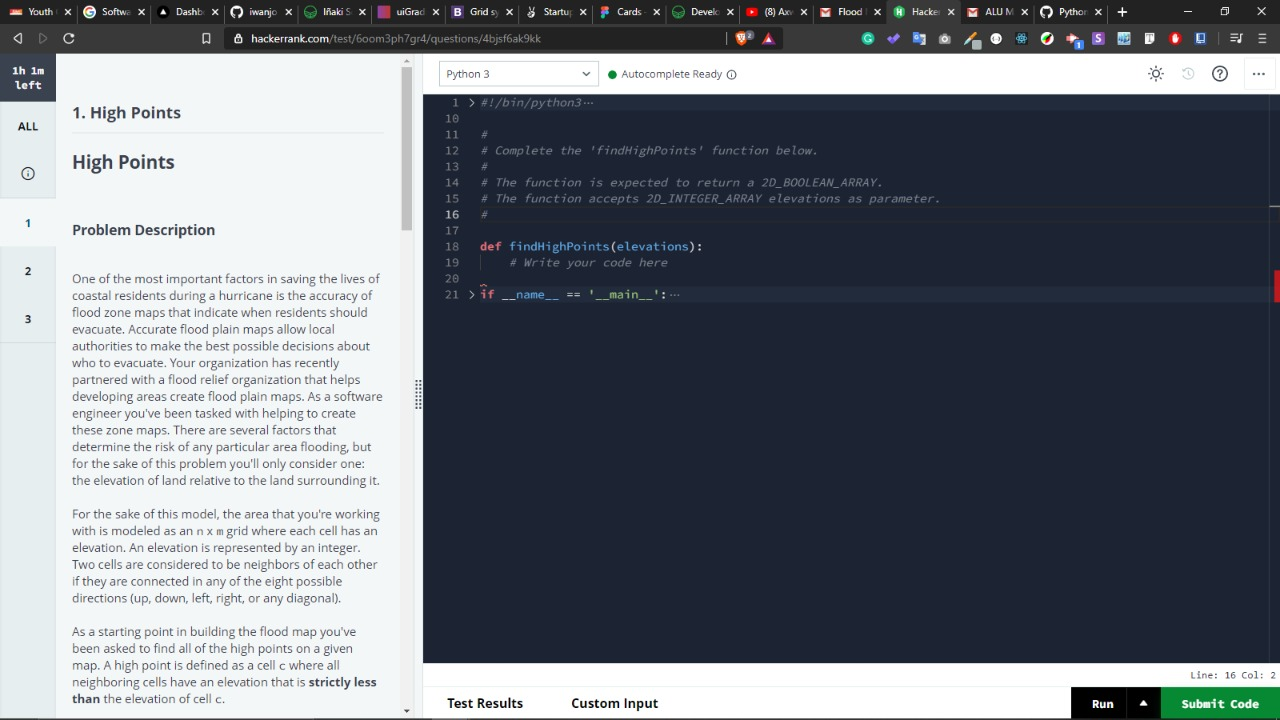
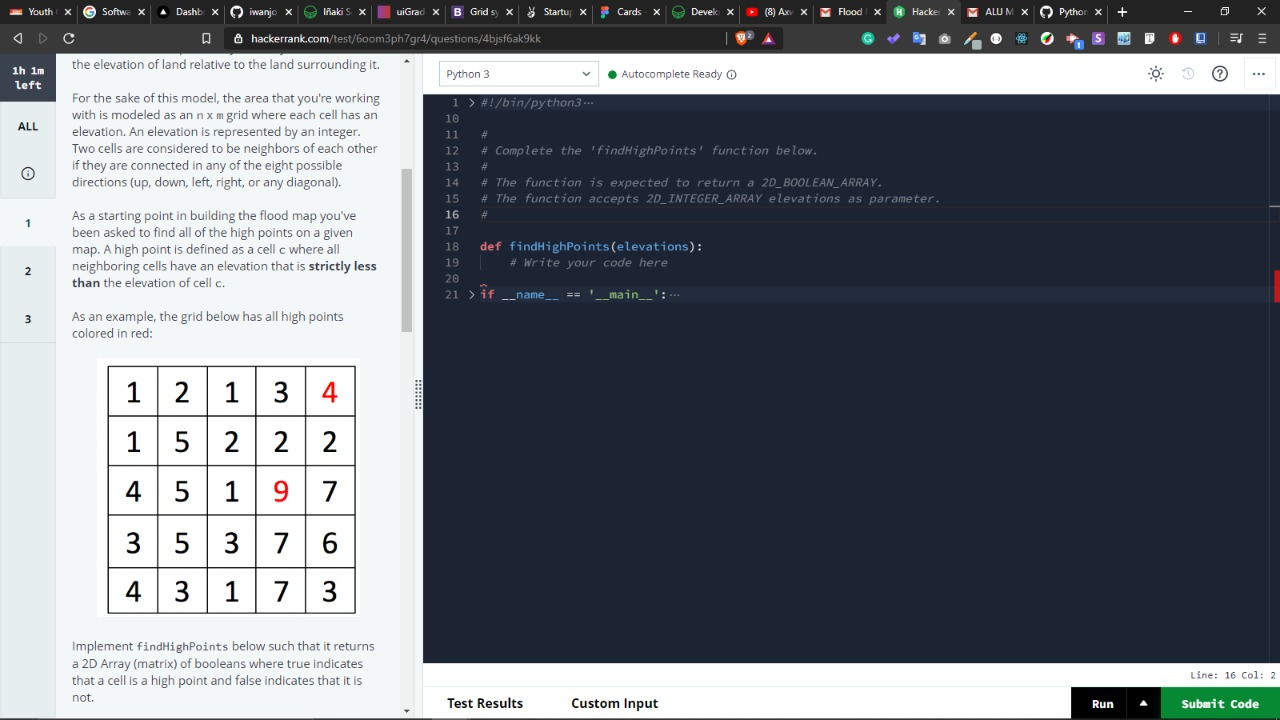
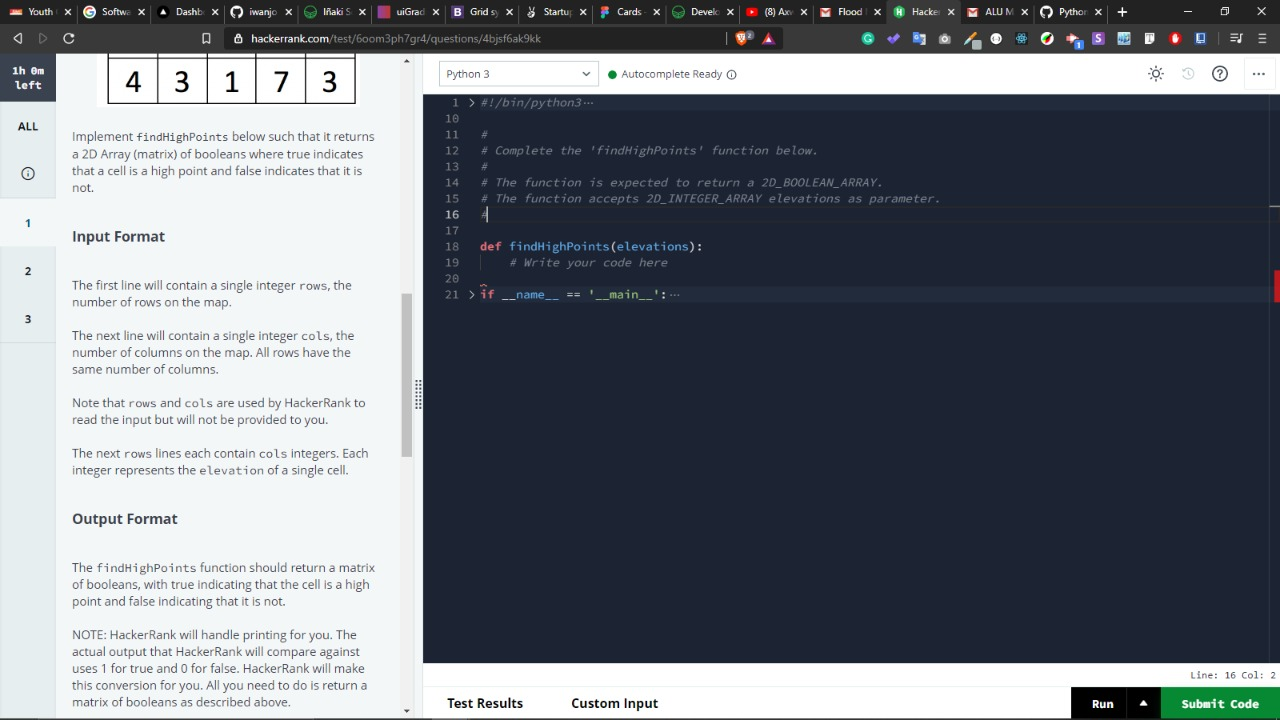
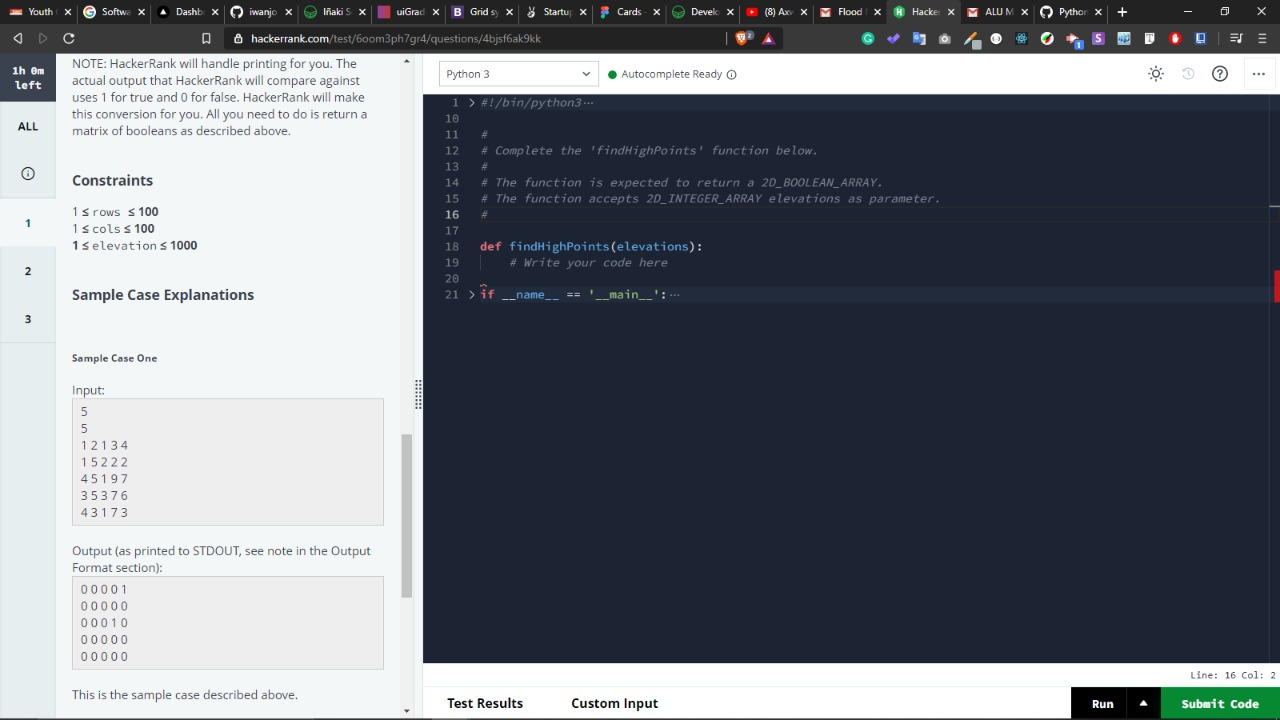
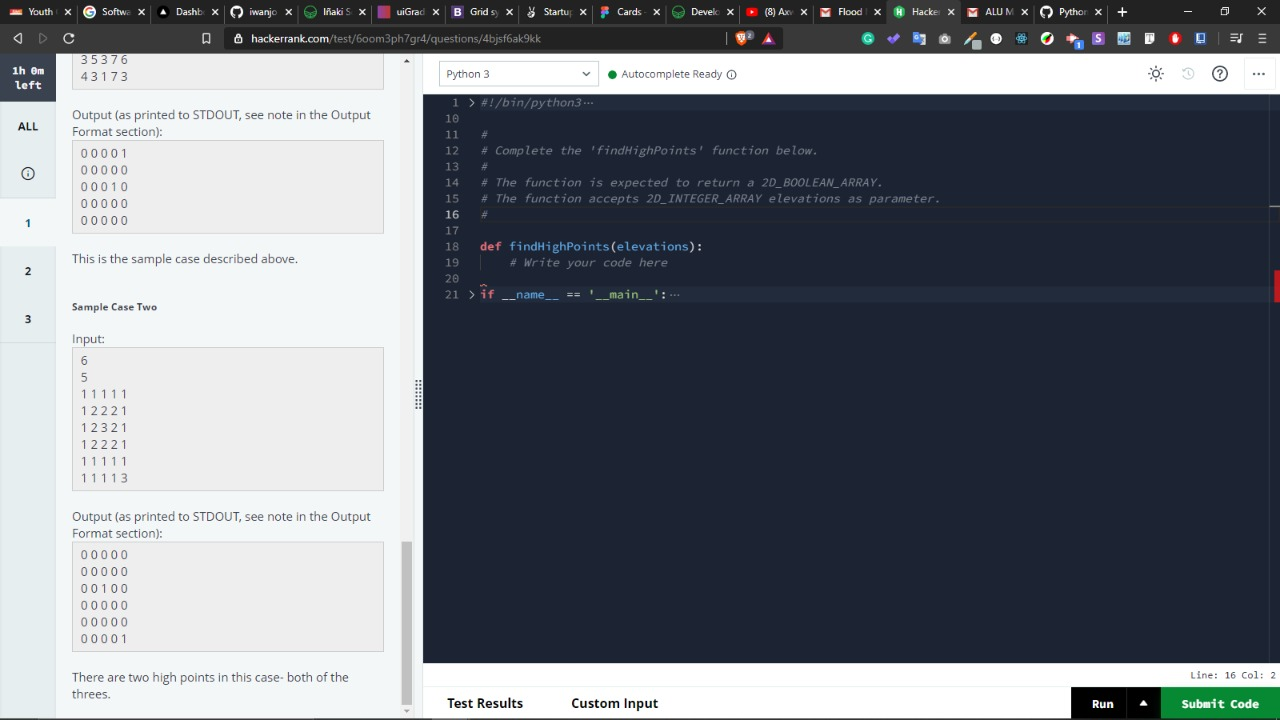


# Question One

In [223]:
import sys
def findHighPoints1(elevations):
  
    highpoints = set()
    rows = len(elevations)
    cols = len(elevations[0])
    
    #we want to visit the each row first so we start with column
    
    for row in range((cols)):
        for col in range((rows)):
            x = neighbor_validator1( (row,col ))
            highpoints.add(x)
#     for row in range((cols)):
#         for col in range((rows)):
#             if (row,col)  in highpoints:
#                     elevations[row][col] = True
#             else:
#                 elevations[row][col] = False
                
#     for i in range(len(elevations)):
#         for j in range(len(elevations[i])):
#             print(elevations[i][j], end = " ")
#         print("" )
    
        
    return highpoints
    

# Function to check if a given cell has neighbours , diagonally, left, up, right and down
    
def neighbor_validator1(curr_poss):
    row, col = curr_poss[0], curr_poss[1]
    value = elevations[row][col]
    #we want to move up  so shift row by -1 
    if row != 0:    up = elevations[row-1][col]
    else:    up = 0
    # we want to move right so shift col by +`
    if col != len(elevations[0]) -1:  right = elevations[row][col+1]        
    else : right = 0
    # we want to move down so shift row by  +1
    if row != len(elevations)-1: down = elevations[row+1][col]
    else: down = 0
    # we want to move left so shift col by -1
    if col != 0: left = elevations[row][col-1]
    else : left = 0
    # we want to move diagonal right up so we move up right 
    if row != 0 and col != len(elevations[0]) -1: 
        upright = elevations[row-1][col+1]
    else : 
        upright = 0
    # we want to move diagonal right down so we move down right 
    if row != len(elevations)-1 and  col != len(elevations[0]) -1:
        downright = elevations[row+1][col+1]
    else: 
        downright =0
    # we want to move diagonal left down so we move down and left
    if col != 0 and row != len(elevations)-1 :
        downleft = elevations[row+1][col-1]
    else:
        downleft =0
    # we want to move diagonal up and left so we move left up
    if row != 0 and col != 0 :
        upleft = elevations[row-1][col-1]
    else:
        upleft = 0
        
        
    # condition to check if the number is bigger than all its neighbours
    if value > up and value > right and value > down and value > left:
        if value > upright and value > downright and value > downleft and value >  upleft:
            return (row, col)
        else:
            return sys.maxsize,sys.maxsize
    else:
        return sys.maxsize,sys.maxsize
  

elevations= [
    [1,2,1,3,4],
    [1,5,2,2,2],
    [4,5,1,9,7],
    [3,5,3,7,6],
    [4,3,1,7,3]
    ]

findHighPoints1(elevations)

{(0, 4), (2, 3), (9223372036854775807, 9223372036854775807)}

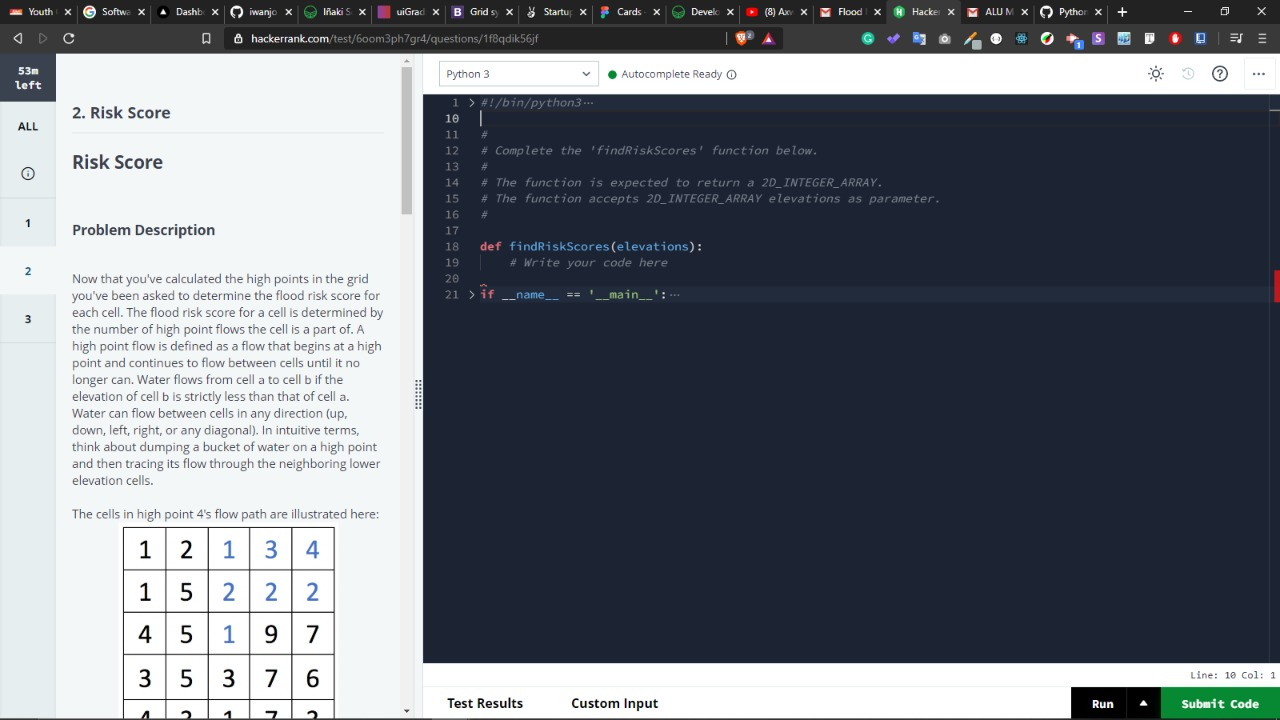
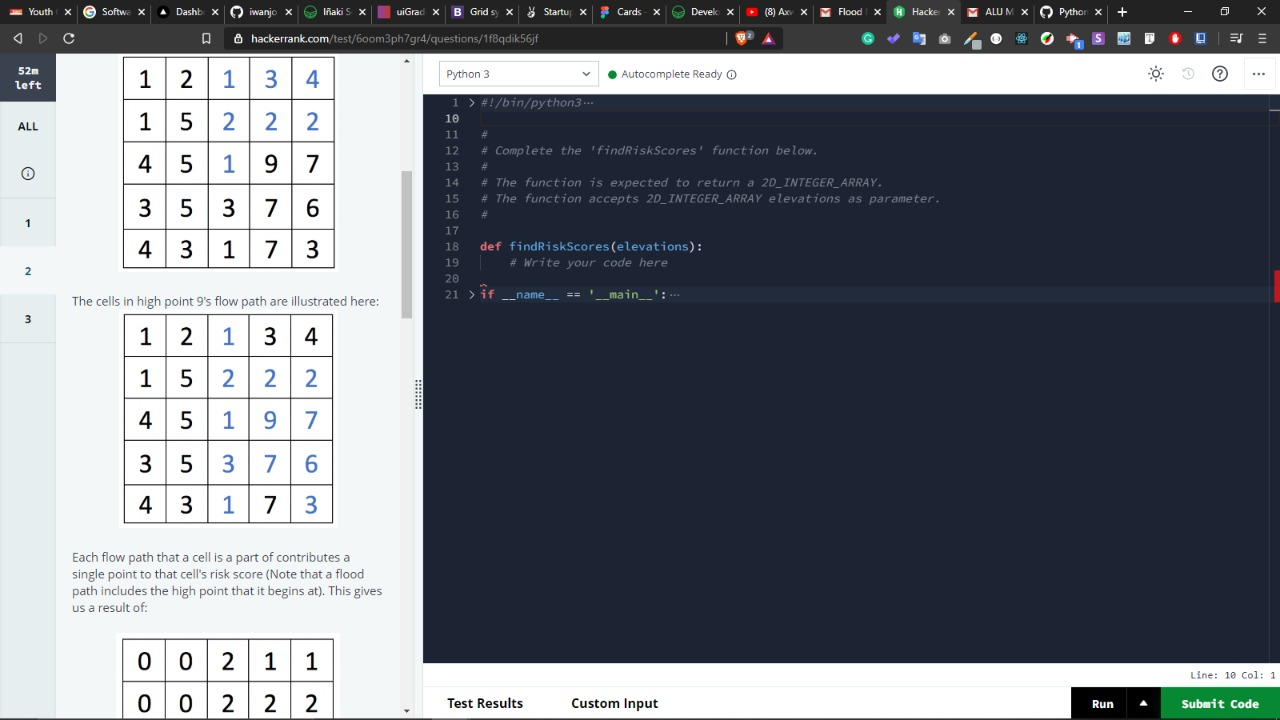
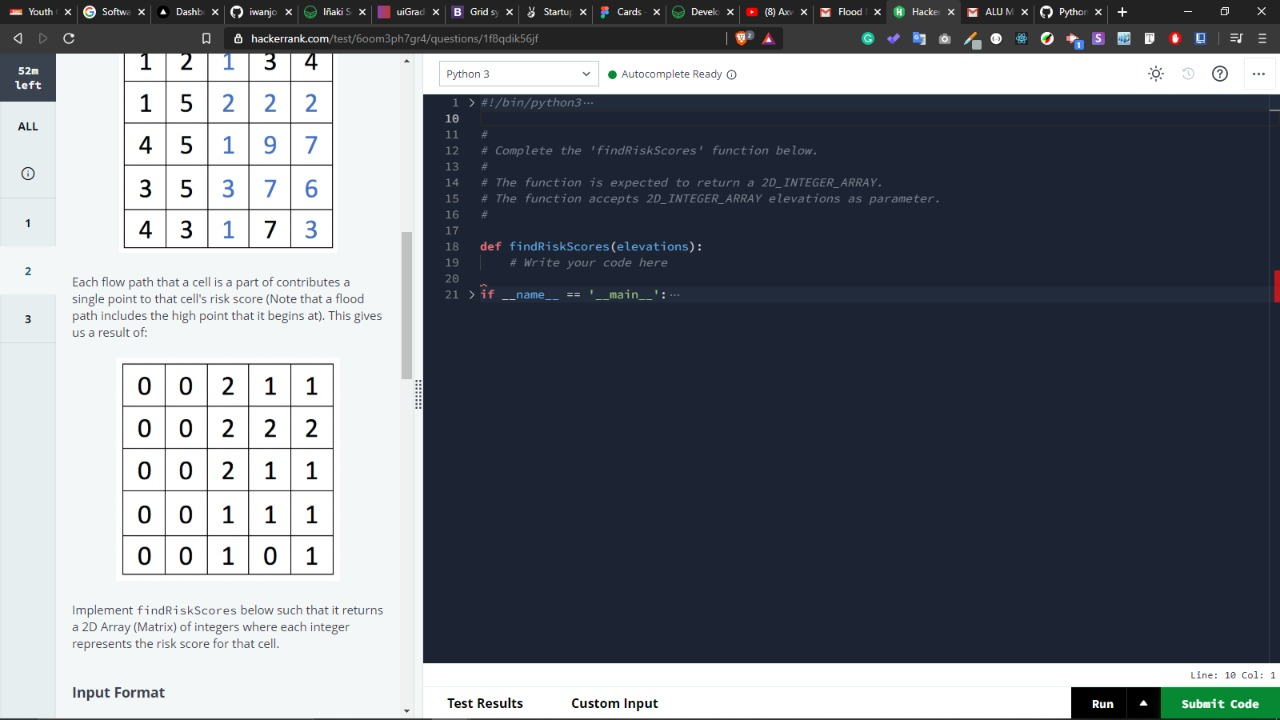
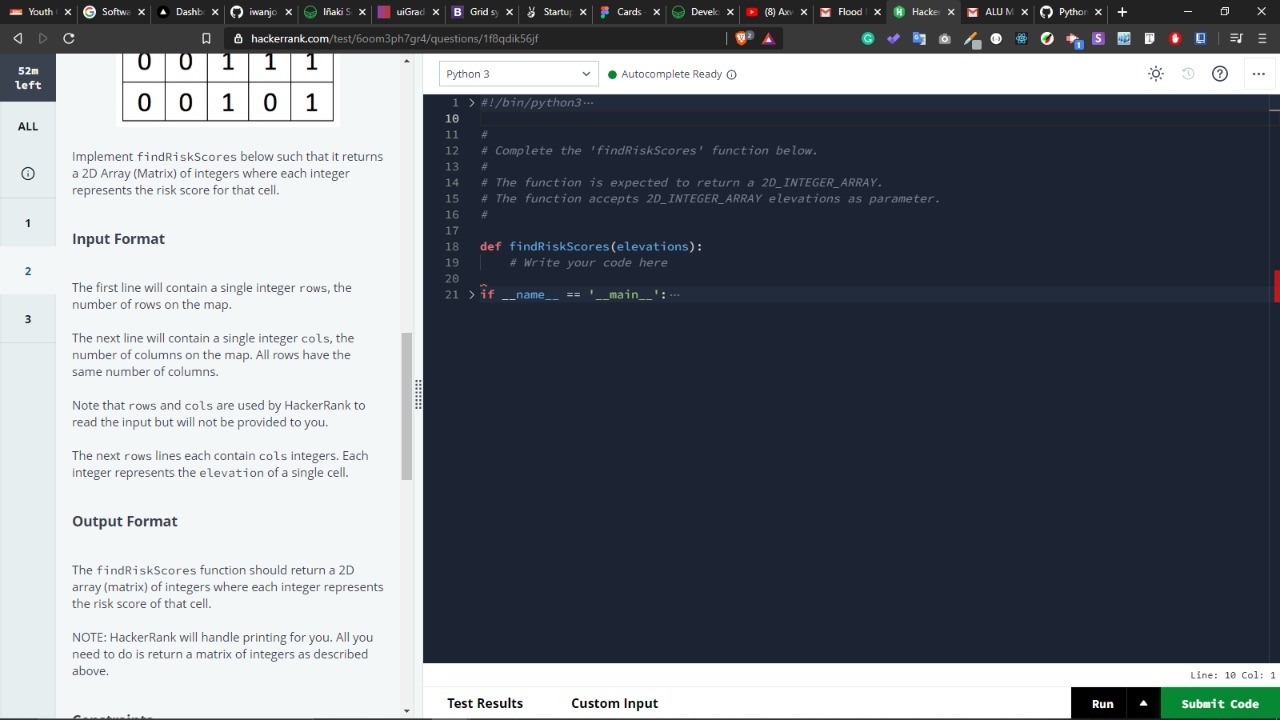
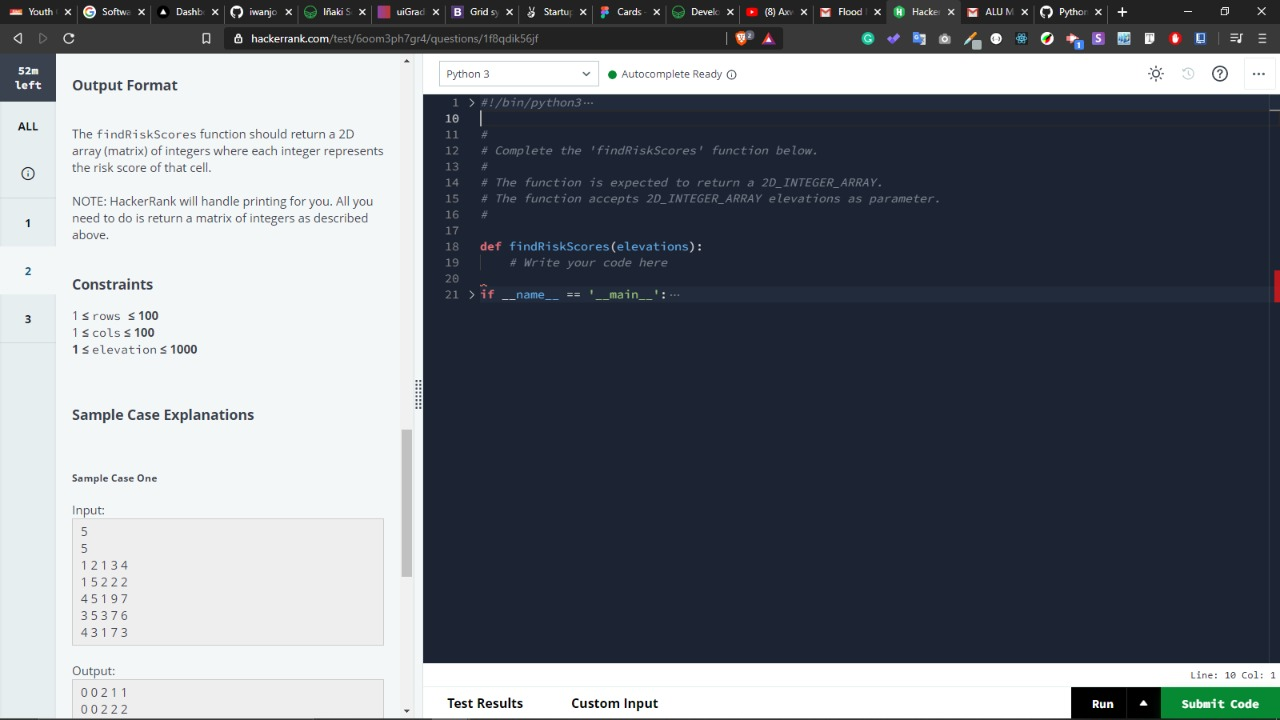
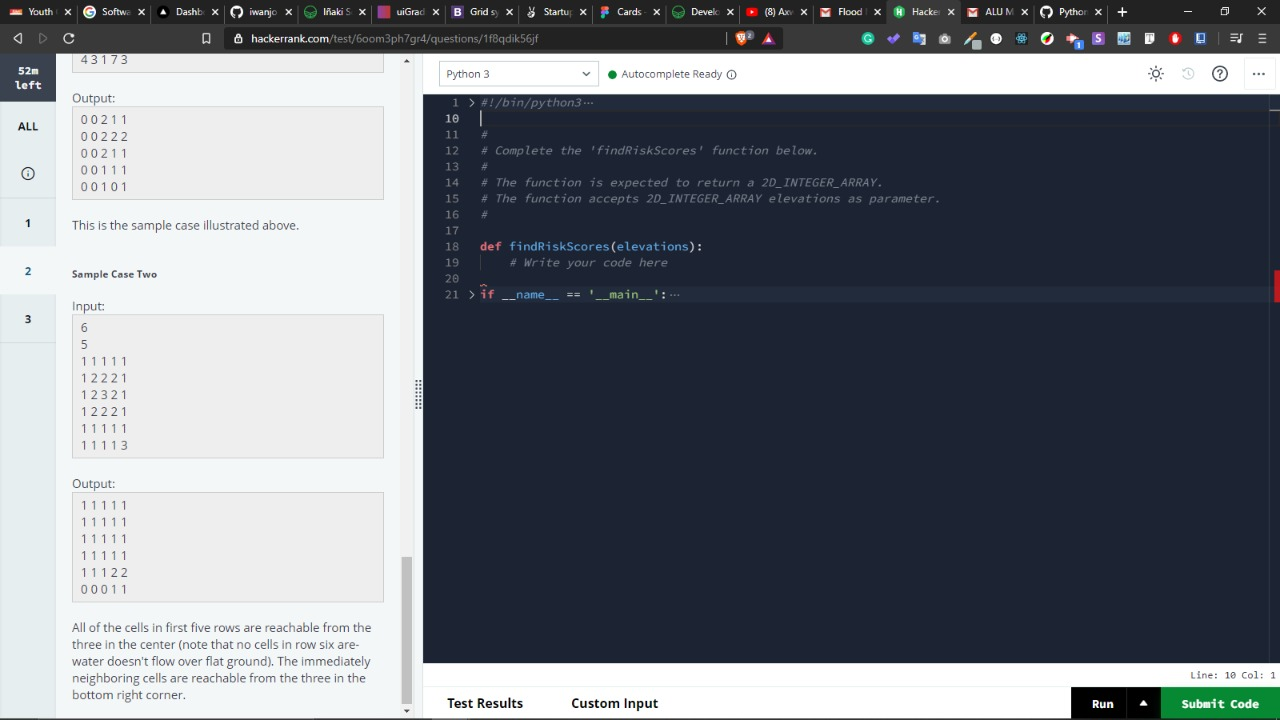

# Question 2 

In [230]:
def findHighPoints(elevations):
    highpoints = findHighPoints1(elevations)
    flowing = True
    # more high points
    rows = len(elevations)
    cols = len(elevations[0])

    newhighpoints = set()
    
    #shed the unrealistic point
    for i in highpoints:
        if sum(i) < 10000:
            newhighpoints.add(i)
            
    z = []
    #get cells that are high points and use them as the starting points
    for row in range((cols)):
        cells = set() 
        for col in range((rows)):
            if (row, col) in newhighpoints:
                cells.add((row, col))
                (neighbr_validator((row, col), cells, True))
                z.append(cells)
    
    # calculate how many times a cell is at high risk 
    hashtable = {}   
    for i in z:
        for j in i:
            if j in hashtable:
                hashtable[j] +=1
            else:
                hashtable[j] =1
                
    
    #convert the matrix to the number of times it could be at risk
    for row in range((cols)):
        for col in range((rows)):
            if (row, col)  in hashtable:
                elevations[row][col] = hashtable[(row,col)]
            elif (row,col) not in hashtable:
                elevations[row][col] = 0
     
    #print out the new matrix of level of risks
    for i in range(len(elevations)):
        for j in range(len(elevations[i])):
            print(elevations[i][j], end = " ")
        print("" )
    
                
        
    

            

# function handles the adjacent cells
def neighbr_validator(curr_poss, cells, going):
    maxrow = len(elevations) -1
    minrow = 0
    maxcol = len(elevations[0])-1
    mincol = 0
    
    row, col = curr_poss[0], curr_poss[1]
    
    
    if maxrow < row or row < minrow:
        return 
    if maxcol <col < mincol:
        return 
    
    value = elevations[row][col]
    #we want to move up  so shift row by -1 
    if row != 0:    up = elevations[row-1][col]
    else:    up = value
    # we want to move right so shift col by +1`
    if col != maxcol:  right = elevations[row][col+1]        
    else : right = value
    # we want to move down so shift row by  +1
    if row != maxrow: down = elevations[row+1][col]
    else: down = value
    # we want to move left so shift col by -1
    if col != 0:
        left = elevations[row][col-1]
    else : left = value
    # we want to move diagonal right up so we move up right 
    if row != 0 and col != maxcol: 
        upright = elevations[row-1][col+1]
    else : 
        upright = value
    # we want to move diagonal right down so we move down right 
    if row != maxrow and  col != maxcol:
        downright = elevations[row+1][col+1]
    else: 
        downright =value
    # we want to move diagonal left down so we move down and left
    if col != 0 and row != maxrow :
        downleft = elevations[row+1][col-1]
    else:
        downleft =value
    # we want to move diagonal up and left so we move left up
    if row != 0 and col != 0 :
        upleft = elevations[row-1][col-1]
    else:
        upleft = value
        
        
    # handle the flooding logic here
    if going == False:
        return cells
    else:
        
        if value > up :
                n = (row-1, col)
                cells.add(n)
                neighbor_validator(n, cells, True)
                
        if value > right:
                n = (row, col+1)
                cells.add(n)
                neighbor_validator(n, cells, True)


        if value > down:
                n = (row+1, col)
                cells.add(n)
                neighbor_validator(n,cells, True)
            
        if value > left :
                n =  (row,col-1)
                cells.add(n)
                neighbor_validator(n, cells, True)
            
        if value > upright:
                n = (row-1 ,col+1 )
                cells.add(n)
                neighbor_validator(n, cells, True)
            
        if value > downright:
                n = (row+1 ,col+1 )
                cells.add(n)
                neighbor_validator(n, cells, True)

        if value > downleft:
                n = (row+1 ,col-1)
                cells.add(n)
                neighbor_validator(n, cells, True)
                    
        if value > upleft:
                n = (row-1 ,col-1)
                cells.add(n)
                neighbor_validator(n, cells, True)
    
            
    n = (sys.maxsize, sys.maxsize)
    neighbor_validator(n, cells, False)            


elevations= [
    [1,2,1,3,4],
    [1,5,2,2,2],
    [4,5,1,9,7],
    [3,5,3,7,6],
    [4,3,1,7,3]
    ]

findHighPoints(elevations)

0 0 2 1 1 
0 0 2 2 2 
0 0 2 1 1 
0 0 1 1 1 
0 0 1 0 1 
